# Convert To CSV

In [ ]:
import pandas as pd
from IPython.display import display, HTML
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
import json

input_file = "1.json"
export_file = "1.csv"

with open(export_file, "w", encoding="utf-8") as file2:
    with open(input_file, "r", encoding="utf-8") as file:
        data = file.readlines()

        file2.writelines('id,text,time,author,votes,reply,heart\n')

        for i, info in enumerate(data):
            js = json.loads(info)
            text = js["text"].strip()
            text = text.replace("\n", "").replace(",", " ").replace("\r", " ")
            time = js["time"]
            author = js["author"]
            votes = js["votes"]
            reply = js["reply"]
            heart = js["heart"]

            file2.writelines(
                f'{i},{text},{time},{author},{votes},{reply},{heart}\n')

# Find Most People Comment

<Axes: xlabel='author'>

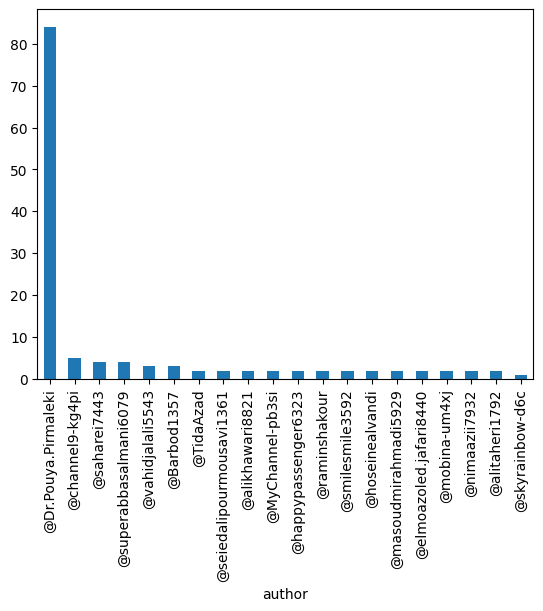

In [30]:
df = pd.read_csv(export_file)
df["author"].value_counts().head(20).plot(kind="bar")

# Most Comment writen by Time 

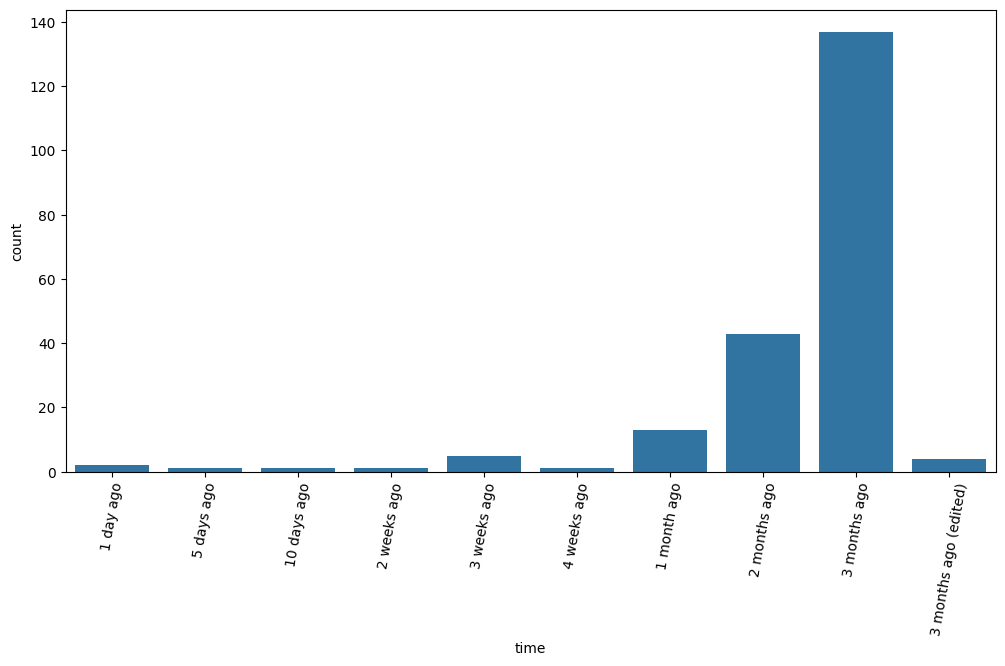

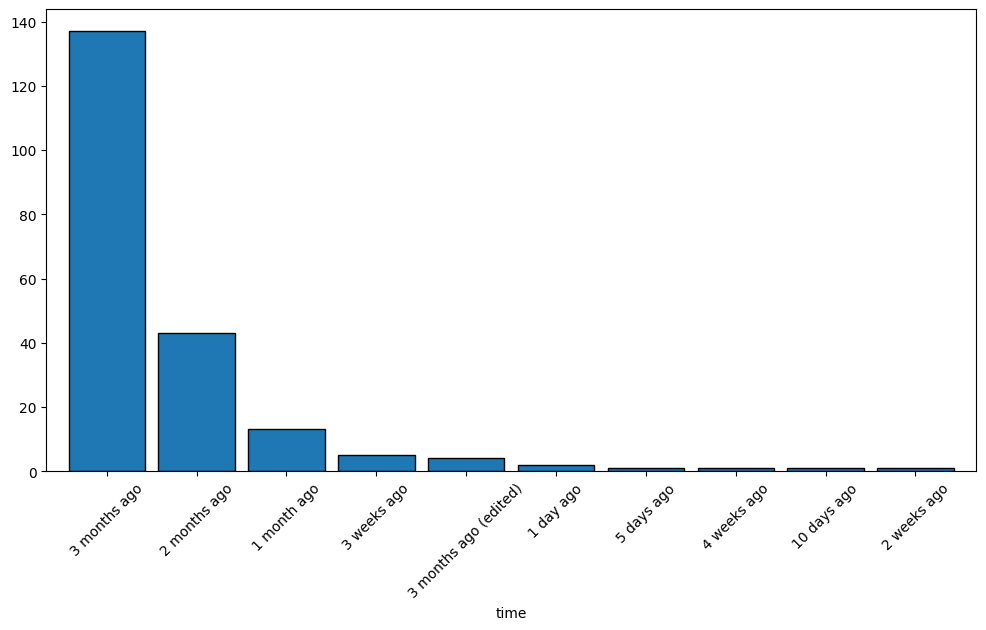

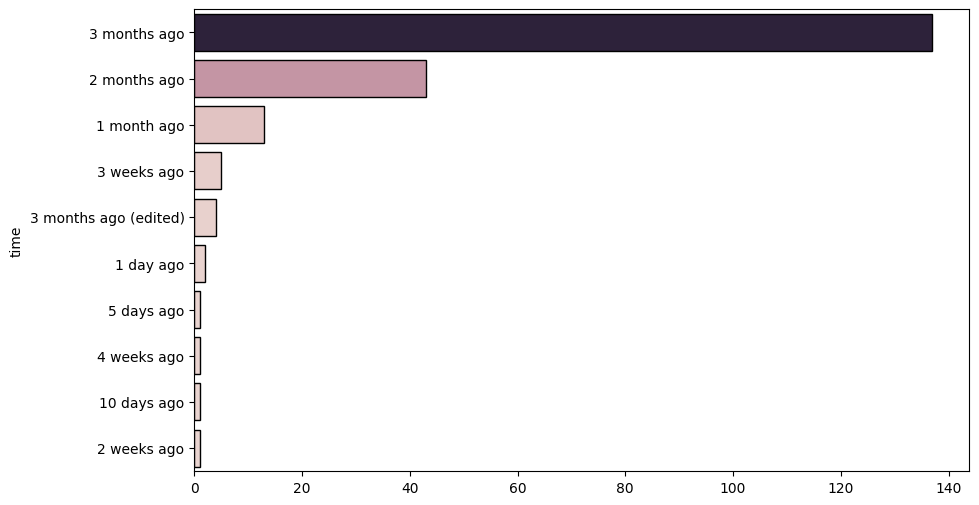

In [64]:
df = pd.read_csv(export_file)
df["time"].value_counts()

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x='time', ax=ax)
ax.tick_params(axis='x', labelrotation=80)
plt.show()

ax = df.time.value_counts().plot(
    kind='bar', rot=45, width=0.85, ec='k', figsize=(12, 6))

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    y=df.time.value_counts().index,
    x=df.time.value_counts().values,
    hue=df.time.value_counts().values,
    orient='h', ec='k', legend=False)

# Heart on comment

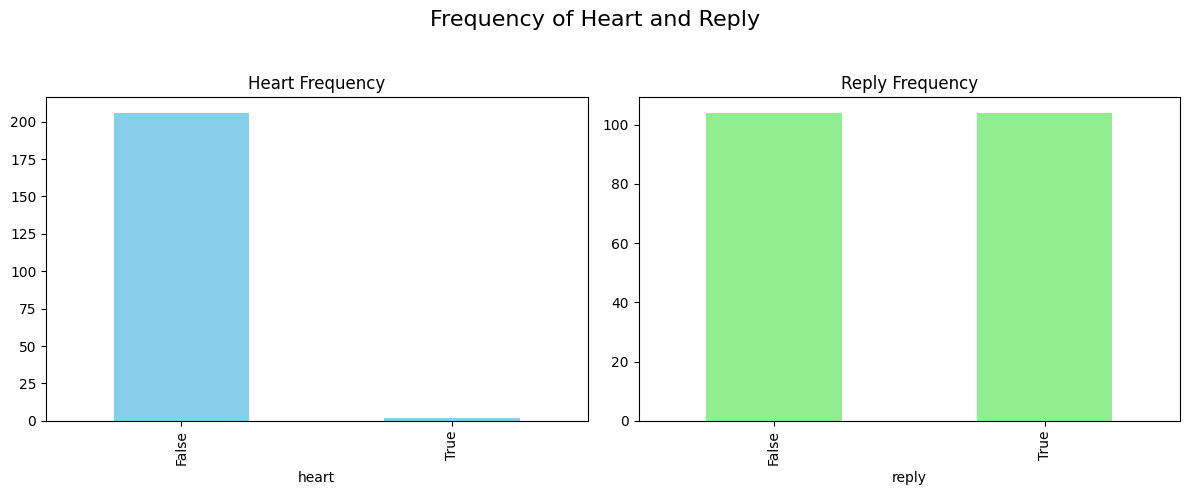

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df["heart"].value_counts().plot(kind="bar", ax=axes[0], color='skyblue')
axes[0].set_title("Heart Frequency")
df["reply"].value_counts().plot(kind="bar", ax=axes[1], color='lightgreen')
axes[1].set_title("Reply Frequency")
fig.suptitle("Frequency of Heart and Reply", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Sort by Vote

In [8]:
votes_sorted = df.sort_values("votes", ascending=False).head(10)
display(HTML(votes_sorted.to_html()))

,id,text,time,author,votes,reply,heart
166,166,استاد! تنها موردی که اگر حل بشه من دیگه آرزویی در جهان نخواهم داشت و می توانم جان به جان آفرین تسلیم کنم، این است که بتونم پرامپتی بنویسم که متن نوشته شده توسط هوش مصنوعی توسط دیتکتورهایی مثل زیرو جی پی تی تشخیص داده نشوند و نوشته شده توسط انسان به نظر بیایند، متاسفانه سایتهای پولی برای تبدیل نوشته حاصل از هوش مصنوعی به سبک انسانی خوب نیستند، اولا پولی هستند ثانیا کیفیت مناسب ندارند، البته من برای متون زبان انگلیسی و سوئدی استفاده می کنم به خصوص در متون آکادمیک اصلا موفق نیستند، این تنها کابوس من هست ، یک مجموعه پرامپ شروع کردم به نوشتن که با ترکیب اونها متن آکادمیک حاصل از چت جی پی تی را جوری دوباره نویسی کنه که انسان نوشته توسط زیرو جی پی تی به نظر بیاد اما تنها سی درصد موفق میشم.,3 months ago (edited),@Barbod1357,10,False,False
80,80,excellent thanks 🌼🌻,3 months ago,@saeedehaalami9066,3,False,False
189,189,بنده در مجموع خیلی روی این دیتکتورها کار نمی کنم، چون اعتقاد دارم که متنهایی که از هوش مصنوعی می گیریم را خودمان باید بازنویسی کنیم و کار نهایی را خودمان بنویسیم. اینجوری دیگه چه نیازی به دیتکتور هست؟,3 months ago,@Dr.Pouya.Pirmaleki,3,True,False
15,15,عالی استاد.... من خودم 7 ساله استاد تمام شدم ولی بیشتر از یک دانشجو دنبال آموزشم...... منتها سرم درد می کنه برای این آموزش ها و استفاده مناسب از این گونه آموزش ها .... زدی به هدف استاد. مرسی.,1 month ago,@Health_Geography,2,False,False
124,124,Sehr schön danke für deine Bemühungen 👍🏼💯,3 months ago,@ali.haschimi2024,2,False,False
201,201,خیلی ممنون استاد. عالی بود🙏🙏🙏,3 months ago,@balaxanim-q9h,2,False,False
164,164,شما خیلی بزرگوار هستید. از شما ممنون هستم.,3 months ago,@user-hl4jg7yg8u,2,False,False
158,158,عالی بود❤,3 months ago,@HamedToronto,2,False,True
171,171,ممنون جناب دکتر مطالب بسیار کاربردی و عالیست 🙏,3 months ago,@abzaramoozeshi-b4g,2,False,False
173,173,دیشب متوجه این توانایی جدید perplexy شدم که شبیه همین هست که باهاش میشه source تعریف کرد و در آنجا فایل آپلود کرد و ازش خواست فقط از همون سورس استفاده کنه ، وقتی رفتم امتحان کنم دیدم فقط برای نسخه پولی پرپلکسی امکان آپلود فایل هست، کلی ناراحت شدم ، امروز که این پست شما را دیدم با خودم گفتم خوب با این حساب کی دیگه نیاز به پرپلکسی داره با نوتبوک ال ام,3 months ago,@Barbod1357,2,False,False


# Read by latest comment

In [56]:
df = pd.read_csv("1.csv").head(20)
display(HTML(df.to_html()))

,id,text,time,author,votes,reply,heart
0,0,آقا اسم اون سایتی که کتاب دانلود می کردید چی بود!؟❤,1 day ago,@nimaazii7932,0,False,False
1,1,عالی بود❤,1 day ago,@nimaazii7932,0,False,False
2,2,salamman az shoma mamnoonam ke mohtavaye aliii baramun misazid .behtarin ha ra baraye shoma arezoomandam.,5 days ago,@arsenal7087,0,False,False
3,3,فاوسی به پادکست اضافه شده؟,10 days ago,@saeedmirnezami6198,0,False,False
4,4,عابیه واقعا ممنونم ازتون امیدوارم در تولید این مطالب ارزشمند موفق و پیروز باشید,2 weeks ago,@علییزدیمقدم,0,False,False
5,5,👍,3 weeks ago,@mnfara2139,0,False,False
6,6,❤,3 weeks ago,@marziie.rahimi,0,False,False
7,7,❤,3 weeks ago,@Snapetaculr,0,False,False
8,8,❤❤,3 weeks ago,@mhhqp8335,0,False,False
9,9,توضیحات عالی هستن,3 weeks ago,@khalijfarsonline,0,False,False
